In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [3]:
df = pd.read_csv("roller_coasters.csv")
df.sample(5)

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
1228,Crazy Croc,Steel,Sit Down,NaN,NaN,NaN,0.0,Wisdom Rides,Loudoun Castle,status.closed.definitely
2754,Hell Cat,Wooden,Sit Down,90.0,33.0,793.0,0.0,S&S,Clementon Park,status.operating
996,Soak'd,Steel,Suspended,NaN,NaN,360.0,0.0,Premier Rides,Freestyle Music Park,status.closed.definitely
1216,Jupiter,Steel,Sit Down,NaN,NaN,1600.0,0.0,Intamin,Kijima Amusement Park,status.operating
275,Jet Star,Steel,Sit Down,NaN,20.0,540.0,0.0,Schwarzkopf,Foire,status.operating


### Data Information

In [4]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2802 entries, 0 to 2801
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2799 non-null   object 
 1   material_type   2802 non-null   object 
 2   seating_type    2802 non-null   object 
 3   speed           1478 non-null   float64
 4   height          1667 non-null   float64
 5   length          1675 non-null   float64
 6   num_inversions  2405 non-null   float64
 7   manufacturer    2802 non-null   object 
 8   park            2802 non-null   object 
 9   status          2802 non-null   object 
dtypes: float64(4), object(6)
memory usage: 219.0+ KB


In [5]:
# Drop duplicated values
df = df.dropna()

In [6]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 0 to 2799
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1279 non-null   object 
 1   material_type   1279 non-null   object 
 2   seating_type    1279 non-null   object 
 3   speed           1279 non-null   float64
 4   height          1279 non-null   float64
 5   length          1279 non-null   float64
 6   num_inversions  1279 non-null   float64
 7   manufacturer    1279 non-null   object 
 8   park            1279 non-null   object 
 9   status          1279 non-null   object 
dtypes: float64(4), object(6)
memory usage: 109.9+ KB


In [7]:
# Data Statistics
df.describe()

,speed,height,length,num_inversions
count,1279.000000,1279.000000,1279.000000,1279.000000
mean,71.574668,28.935106,641.050039,1.265833
std,28.124453,38.562609,396.610955,1.973537
min,0.000000,0.000000,0.000000,0.000000
25%,50.000000,15.000000,354.500000,0.000000
50%,75.000000,25.000000,566.000000,0.000000
75%,89.000000,36.000000,877.000000,2.000000
max,240.000000,902.000000,2479.000000,14.000000


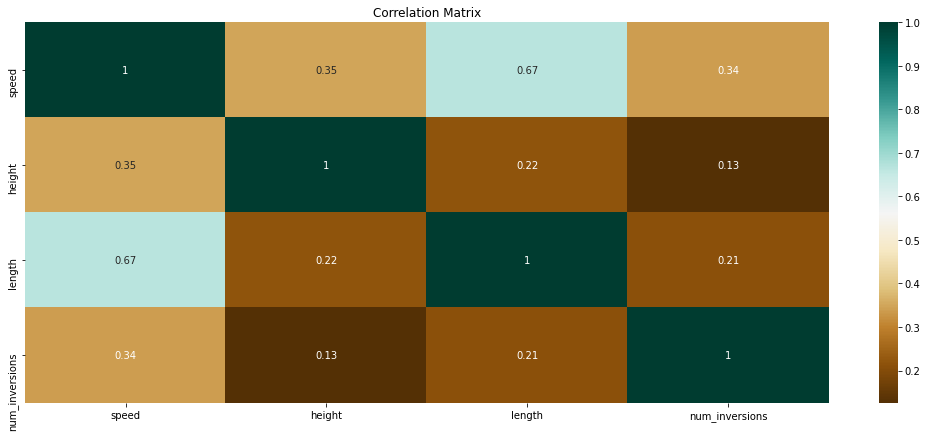

In [8]:
# Correlation
plt.figure(figsize = (18, 7))
correlation = df.corr()
sns.heatmap(correlation, cmap = "BrBG", annot = True)
plt.title("Correlation Matrix")
plt.show()

In [9]:
# Clean Status Column
df["status"] = df["status"].str.split(".")
df["status"] = df["status"].str.get(1)

In [10]:
# Rename Columns
df = df.rename(columns = {"name": "Swing",
                          "material_type": "Material",
                          "seating_type": "Seating Type",
                          "speed": "Speed",
                          "height": "Height",
                          "length": "Length",
                          "num_inversions": "Inversions",
                          "manufacture": "Manufacturer",
                          "park": "Park",
                          "status": "Status"})

In [11]:
df.head()

,Swing,Material,Seating Type,Speed,Height,Length,Inversions,manufacturer,Park,Status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,operating


**Check Speed Data Spreading**

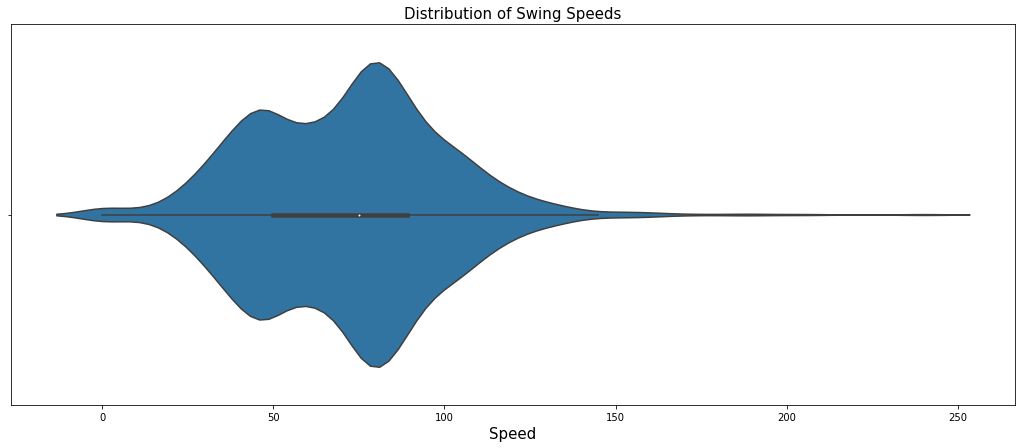

In [12]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = df["Speed"], data = df)
plt.title("Distribution of Swing Speeds", size = 15)
plt.xlabel("Speed", size = 15)
plt.show()

**Check Height Data Spreading**

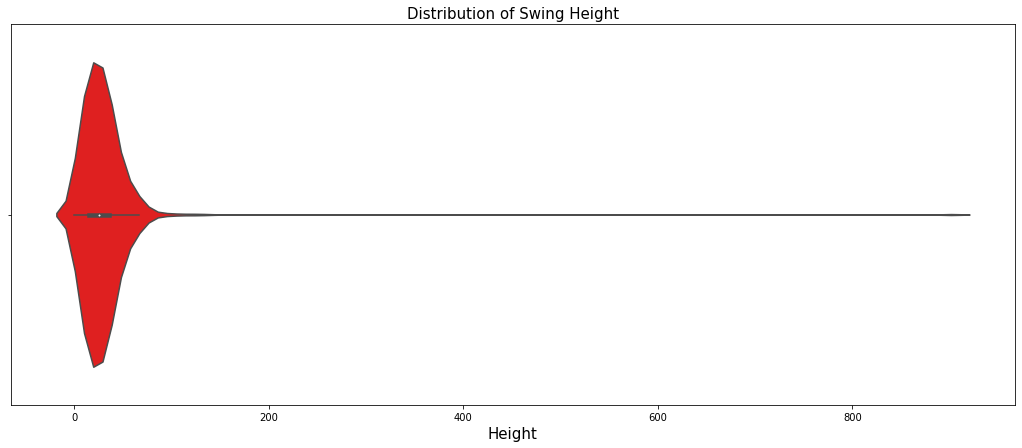

In [13]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = df["Height"], data = df, color = "red")
plt.title("Distribution of Swing Height", size = 15)
plt.xlabel("Height", size = 15)
plt.show()

**Check Length Data Spreading**

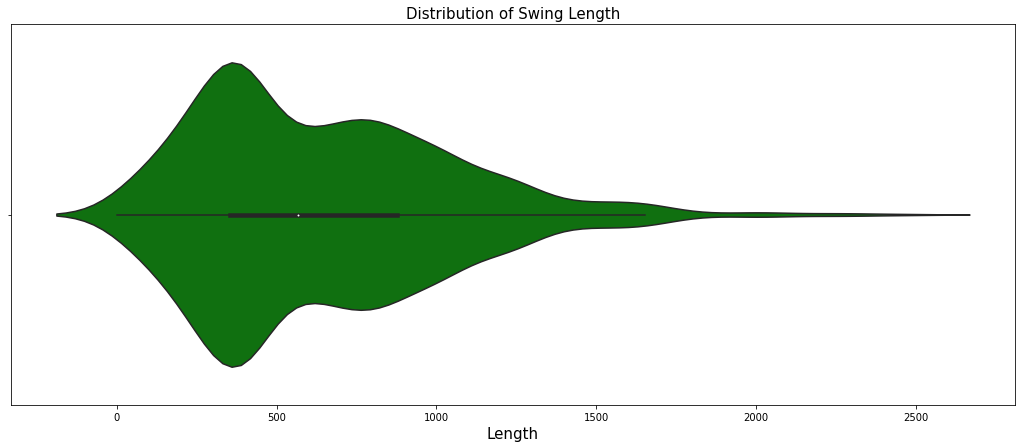

In [14]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = df["Length"], data = df, color = "green")
plt.title("Distribution of Swing Length", size = 15)
plt.xlabel("Length", size = 15)
plt.show()

### Analysis

**Top 10 Number of Swing by Name**

In [15]:
s = df["Swing"].value_counts().to_frame().reset_index()
s = s.sort_values(by = "Swing", ascending = False)
s.columns = ["Swing", "Frequency"]
s.head(10)

,Swing,Frequency
0,Boomerang,20
1,Looping Star,12
2,Corkscrew,10
3,Cobra,7
4,Wild Mouse,7
5,Tornado,7
6,Goliath,7
7,Joker,6
8,Pandemonium,5
9,Crazy Mouse,5


**Material Type by Swing**

In [16]:
m = df["Material"].value_counts().to_frame().reset_index()
m = m.sort_values(by = "Material", ascending = False)
m.columns = ["Material", "Swings"]
m

,Material,Swings
0,Steel,1047
1,Wooden,136
2,na,79
3,Hybrid,17


**Seating Types in Swing**

In [17]:
st = df["Seating Type"].value_counts().to_frame().reset_index()
st.columns = ["Swing Type", "Swings"]
st

,Swing Type,Swings
0,Sit Down,965
1,Inverted,104
2,Spinning,54
3,Suspended,26
4,Flying,23
5,Floorless,22
6,Water Coaster,16
7,Stand Up,16
8,4th Dimension,16
9,Wing,12


**Top 10 Swing Manufacturers**

In [18]:
sm = df["manufacturer"].value_counts().to_frame().reset_index()
sm.columns = ["Manufacturer", "Swings"]
sm.head(10)

,Manufacturer,Swings
0,Vekoma,217
1,Intamin,112
2,B&M,109
3,Zierer,88
4,Mack,81
5,Schwarzkopf,71
6,Arrow,60
7,Gerstlauer,58
8,Maurer,46
9,Zamperla,40


**Top 10 Parks by Swing**

In [19]:
ps = df["Park"].value_counts().to_frame().reset_index()
ps.columns = ["Park", "Swings"]
ps.head(10)

,Park,Swings
0,Foire,22
1,Six Flags Magic Mountain,22
2,Cedar Point,21
3,Canada's Wonderland,16
4,Kings Island,16
5,Six Flags Great America,15
6,Kings Dominion,14
7,Six flags Over Texas,14
8,Carowinds,14
9,Walibi Belgium,13


**Swing Status**

In [20]:
ss = df["Status"].value_counts().to_frame().reset_index()
ss.columns = ["Status", "Swings"]
ss

,Status,Swings
0,operating,1034
1,closed,177
2,construction,17
3,retracked,16
4,announced,16
5,relocated,15
6,unknown,4


### Advanced Analytics

**Most Swings by Materials**

In [21]:
sm = df.groupby(["Swing", "Material"])["Material"].agg(["count"]).reset_index()
sm = sm.sort_values(by = "count", ascending = False)
sm = sm.drop_duplicates("Material", keep = "first")
sm.columns = ["Swing", "Material", "Frequency"]
sm

,Swing,Material,Frequency
97,Boomerang,Steel,20
455,Jungle Trailblazer,Wooden,4
842,Stress Express,na,4
603,New Texas Giant,Hybrid,1


**Most Swings by Seating Type**

In [22]:
ss = df.groupby(["Swing", "Seating Type"])["Seating Type"].agg(["count"]).reset_index()
ss = ss.sort_values(by = "count", ascending = False)
ss = ss.drop_duplicates("Seating Type", keep = "first")
ss.columns = ["Swing", "Seating Type", "Frequency"]
ss

,Swing,Seating Type,Frequency
97,Boomerang,Sit Down,20
623,Pandemonium,Spinning,5
62,Batman The Ride,Inverted,4
434,Joker,4th Dimension,4
847,Superman - Ultimate Flight,Flying,3
973,Ultra Twister,Pipeline,2
757,Shockwave,Stand Up,2
736,Schweizer Bobbahn,Bobsleigh,2
201,Dominator,Floorless,2
55,Bat,Suspended,2


**Top 10 Swings by Speed**

In [23]:
ss = df.sort_values(by = "Speed", ascending = False)
ss.head(10)

,Swing,Material,Seating Type,Speed,Height,Length,Inversions,manufacturer,Park,Status
1397,Formula Rossa,Steel,Sit Down,240.0,52.0,2000.0,0.0,Intamin,Ferrari World,operating
138,Kingda Ka,Steel,Sit Down,206.0,139.0,950.0,0.0,Intamin,Six Flags Great Adventure,operating
143,Top Thrill Dragster,Steel,Sit Down,192.0,128.0,853.0,0.0,Intamin,Cedar Point,operating
1751,Red Force,Steel,Sit Down,185.0,112.0,880.0,0.0,Intamin,Ferrari Land,operating
140,Do-Dodonpa,Steel,Sit Down,172.0,52.0,1189.0,0.0,S&S,Fuji-Q Highland,operating
246,Tower of Terror II,Steel,Sit Down,160.0,115.0,372.0,0.0,Intamin,Dreamworld,operating
1251,Ring Racer,Steel,Sit Down,160.0,38.0,1215.0,0.0,S&S,Nürburgring,closed
160,Superman : Escape from Krypton,Steel,Sit Down,160.0,126.0,376.0,0.0,Intamin,Six Flags Magic Mountain,operating
603,Steel Dragon 2000,Steel,Sit Down,153.0,97.0,2479.0,0.0,Morgan,Nagashima Spa Land,operating
1829,Fury 325,Steel,Sit Down,153.0,99.0,2012.0,0.0,B&M,Carowinds,operating


**Top 10 Swings by Height**

In [24]:
sh = df.sort_values(by = "Height", ascending = False)
sh.head(10)

,Swing,Material,Seating Type,Speed,Height,Length,Inversions,manufacturer,Park,Status
730,Crazy Train,Steel,Sit Down,40.0,902.0,233.0,0.0,Pinfari,Codona's Amusement Park,operating
683,Mighty Mini Mega,Steel,Sit Down,40.0,902.0,233.0,0.0,Pinfari,Adventure Island,operating
138,Kingda Ka,Steel,Sit Down,206.0,139.0,950.0,0.0,Intamin,Six Flags Great Adventure,operating
143,Top Thrill Dragster,Steel,Sit Down,192.0,128.0,853.0,0.0,Intamin,Cedar Point,operating
160,Superman : Escape from Krypton,Steel,Sit Down,160.0,126.0,376.0,0.0,Intamin,Six Flags Magic Mountain,operating
246,Tower of Terror II,Steel,Sit Down,160.0,115.0,372.0,0.0,Intamin,Dreamworld,operating
1751,Red Force,Steel,Sit Down,185.0,112.0,880.0,0.0,Intamin,Ferrari Land,operating
1829,Fury 325,Steel,Sit Down,153.0,99.0,2012.0,0.0,B&M,Carowinds,operating
603,Steel Dragon 2000,Steel,Sit Down,153.0,97.0,2479.0,0.0,Morgan,Nagashima Spa Land,operating
155,Millennium Force,Steel,Sit Down,150.0,94.0,2010.0,0.0,Intamin,Cedar Point,operating


**Top 10 Swings by Length**

In [25]:
sl = df.sort_values(by = "Length", ascending = False)
sl.head(10)

,Swing,Material,Seating Type,Speed,Height,Length,Inversions,manufacturer,Park,Status
603,Steel Dragon 2000,Steel,Sit Down,153.0,97.0,2479.0,0.0,Morgan,Nagashima Spa Land,operating
519,Daidarasaurus,Steel,Sit Down,73.0,29.0,2340.0,0.0,Sansei Yusoki,Expoland,closed
122,Ultimate,Steel,Sit Down,80.0,48.0,2268.0,0.0,Big Country Mitioneering,Lightwater Valley,operating
172,Beast,Wooden,Sit Down,104.0,34.0,2243.0,0.0,Charlie Dinn,Kings Island,operating
170,Son of Beast,Wooden,Sit Down,126.0,66.0,2144.0,0.0,Premier Rides,Kings Island,closed
512,Fujiyama,Steel,Sit Down,130.0,79.0,2045.0,0.0,Togo,Fuji-Q Highland,operating
1829,Fury 325,Steel,Sit Down,153.0,99.0,2012.0,0.0,B&M,Carowinds,operating
155,Millennium Force,Steel,Sit Down,150.0,94.0,2010.0,0.0,Intamin,Cedar Point,operating
1397,Formula Rossa,Steel,Sit Down,240.0,52.0,2000.0,0.0,Intamin,Ferrari World,operating
373,The Voyage,Wooden,Sit Down,108.0,49.0,1963.0,0.0,Gravity Group,Holiday World,operating


**Top 10 Swings by Manufacturers**

In [26]:
sm = df.groupby(["manufacturer", "Swing"])["Swing"].agg(["count"]).reset_index()
sm = sm.sort_values(by = "count", ascending = False)
sm = sm.drop_duplicates("manufacturer", keep = "first")
sm = sm.head(10)
sm.columns = ["Manufacturer", "Swing", "Frequency"]
sm

,Manufacturer,Swing,Frequency
841,Vekoma,Boomerang,20
767,Schwarzkopf,Looping Star,12
15,Arrow,Corkscrew,6
273,Gerstlauer,Pandemonium,5
307,Gravity Group,Jungle Trailblazer,4
66,B&M,Batman The Ride,4
720,S&S,Joker,4
592,Philadelphia Toboggan Coaster,Comet,4
689,Reverchon,Crazy Mouse,4
1094,Zierer,Marienkäferbahn,3


**Parks having more than 1 Swing**

In [27]:
sp = df.groupby(["Park", "Swing"])["Swing"].agg(["count"]).reset_index()
sp = sp.sort_values(by = "count", ascending = False)
sp = sp.drop_duplicates("Park", keep = "first")
sp.columns = ["Park", "Swings", "Count"]
sp = sp[sp["Count"] > 1]
sp

,Park,Swings,Count
1095,Tayto Park,Flight School,2
804,Parc de la Récréation,Non Renseigné,2


**Status of Swings**

In [28]:
ss = df.groupby(["Status", "Swing"])["Swing"].agg(["count"]).reset_index()
ss = ss.sort_values(by = "count", ascending = False)
ss = ss.drop_duplicates("Status", keep = "first")
ss

,Status,Swing,count
268,operating,Boomerang,18
88,closed,Looping Star,6
6,announced,Non Renseigné,2
1079,relocated,Bat Coaster,2
1093,retracked,Colossus,1
1109,unknown,Broca,1
181,construction,TRON Legacy Coaster,1


**Top Seating Type by Material**

In [29]:
sm = df.groupby(["Material", "Seating Type"])["Seating Type"].agg(["count"]).reset_index()
sm = sm.sort_values(by = "count", ascending = False)
sm = sm.drop_duplicates("Material", keep = "first")
sm

,Material,Seating Type,count
8,Steel,Sit Down,760
15,Wooden,Sit Down,135
22,na,Sit Down,53
0,Hybrid,Sit Down,17


**Speed of Swing by Material**

In [30]:
ssm = df.groupby("Material")["Speed"].agg(["min", "mean", "max"]).round(2)
ssm = ssm.reset_index()
ssm.columns = ["Material", "Min Speed", "Avg Speed", "Max Speed"]
ssm

,Material,Min Speed,Avg Speed,Max Speed
0,Hybrid,50.0,95.53,119.0
1,Steel,0.0,70.11,240.0
2,Wooden,32.0,82.76,126.0
3,na,0.0,66.53,118.0


**Height of Swing by Material** 

In [31]:
hsm = df.groupby("Material")["Height"].agg(["min", "mean", "max"]).round(2)
hsm = hsm.reset_index()
hsm.columns = ["Material", "Min Height", "Avg Height", "Max Height"]
hsm

,Material,Min Height,Avg Height,Max Height
0,Hybrid,15.0,39.88,63.0
1,Steel,0.0,28.89,902.0
2,Wooden,11.0,29.42,66.0
3,na,0.0,26.38,60.0


**Length of Swing by Material**

In [32]:
lsm = df.groupby("Material")["Length"].agg(["min", "mean", "max"]).round(2)
lsm = lsm.reset_index()
lsm.columns = ["Material", "Min Length", "Avg Length", "Max Length"]
lsm

,Material,Min Length,Avg Length,Max Length
0,Hybrid,732.0,1153.71,1750.0
1,Steel,0.0,594.51,2479.0
2,Wooden,316.0,990.82,2243.0
3,na,0.0,545.44,1278.0


**Top Manufacturer by Material**

In [33]:
mm = df.groupby(["Material", "manufacturer"])["manufacturer"].agg(["count"]).reset_index()
mm = mm.sort_values(by = "count", ascending = False)
mm = mm.drop_duplicates("Material", keep = "first")
mm.columns = ["Material", "Manufacturer", "Swing"]
mm

,Material,Manufacturer,Swing
60,Steel,Vekoma,199
70,Wooden,GCI,27
114,na,Vekoma,15
2,Hybrid,RMC,12


**Top Parks by Material**

In [34]:
pm = df.groupby(["Material", "Park"])["Park"].agg(["count"]).reset_index()
pm = pm.sort_values(by = "count", ascending = False)
pm = pm.drop_duplicates("Material", keep = "first")
pm

,Material,Park,count
110,Steel,Foire,21
412,Wooden,Kings Island,5
0,Hybrid,Cedar Point,4
530,na,Wonderland Eurasia,4


**Most Status by Material**

In [35]:
msm = df.groupby(["Material", "Status"])["Status"].agg(["count"]).reset_index()
msm = msm.sort_values(by = "count", ascending = False)
msm = msm.drop_duplicates("Material", keep = "first")
msm

,Material,Status,count
5,Steel,operating,846
10,Wooden,operating,109
15,na,operating,63
1,Hybrid,operating,16


**Frequent Swing by Seating Type**

In [36]:
ss = df.groupby(["Seating Type", "Swing"])["Swing"].agg(["count"]).reset_index()
ss = ss.sort_values(by = "count", ascending = False)
ss = ss.drop_duplicates("Seating Type", keep = "first")
ss

,Seating Type,Swing,count
231,Sit Down,Boomerang,20
999,Spinning,Pandemonium,5
73,Inverted,Batman The Ride,4
6,4th Dimension,Joker,4
56,Flying,Superman - Ultimate Flight,3
163,Pipeline,Ultra Twister,2
1039,Stand Up,Vortex,2
1041,Suspended,Bat,2
21,Bobsleigh,Schweizer Bobbahn,2
25,Floorless,Dominator,2


**Frequent Seating Type by Material**

In [37]:
fsm = df.groupby(["Seating Type", "Material"])["Material"].agg(["count"]).reset_index()
fsm = fsm.sort_values(by = "count", ascending = False)
fsm = fsm.drop_duplicates("Seating Type", keep = "first")
fsm

,Seating Type,Material,count
15,Sit Down,Steel,760
9,Inverted,Steel,97
18,Spinning,Steel,50
21,Suspended,Steel,22
5,Floorless,Steel,21
7,Flying,Steel,21
20,Stand Up,Steel,16
0,4th Dimension,Steel,15
23,Water Coaster,Steel,14
11,Motorbike,Steel,10


**Speed by Seating Type**

In [38]:
sst = df.groupby("Seating Type")["Speed"].agg(["min", "mean", "max"]).round(2).reset_index()
sst = sst.sort_values(by = "mean", ascending = False)
sst = sst.drop_duplicates("Seating Type", keep = "first")
sst.columns = ["Seating Type", "Min Speed", "Avg Speed", "Max Speed"]
sst

,Seating Type,Min Speed,Avg Speed,Max Speed
3,Floorless,72.0,99.50,120.0
13,Wing,0.0,95.17,135.0
10,Stand Up,72.0,86.25,105.0
5,Inverted,22.0,79.53,112.0
12,Water Coaster,33.0,72.06,100.0
8,Sit Down,0.0,71.45,240.0
7,Pipeline,70.0,70.67,71.0
6,Motorbike,47.0,69.64,95.0
4,Flying,41.0,69.61,100.0
0,4th Dimension,0.0,63.50,126.0


**Height by Seating Type**

In [39]:
hst = df.groupby("Seating Type")["Height"].agg(["min", "mean", "max"]).round(2).reset_index()
hst = hst.sort_values(by = "mean", ascending = False)
hst = hst.drop_duplicates("Seating Type", keep = "first")
hst.columns = ["Seating Type", "Min Height", "Avg Height", "Max Height"]
hst

,Seating Type,Min Height,Avg Height,Max Height
3,Floorless,28.0,44.00,68.0
13,Wing,0.0,41.67,64.0
0,4th Dimension,20.0,36.75,76.0
10,Stand Up,26.0,34.69,47.0
5,Inverted,7.0,33.16,58.0
7,Pipeline,29.0,29.33,30.0
4,Flying,15.0,29.26,52.0
8,Sit Down,0.0,28.93,902.0
12,Water Coaster,17.0,28.44,45.0
1,Alpine,25.0,25.00,25.0


**Length by Seating Type**

In [40]:
lst = df.groupby("Seating Type")["Length"].agg(["min", "mean", "max"]).round(2).reset_index()
lst = lst.sort_values(by = "mean", ascending = False)
lst = lst.drop_duplicates("Seating Type", keep = "first")
lst.columns = ["Seating Type", "Min Length", "Avg Length", "Max Length"]
lst

,Seating Type,Min Length,Avg Length,Max Length
3,Floorless,500.0,969.36,1283.0
10,Stand Up,500.0,881.69,1332.0
13,Wing,0.0,837.67,1280.0
4,Flying,320.0,716.04,1097.0
5,Inverted,125.0,714.32,1260.0
8,Sit Down,0.0,642.33,2479.0
2,Bobsleigh,396.0,583.00,990.0
6,Motorbike,300.0,563.73,970.0
12,Water Coaster,217.0,509.19,890.0
11,Suspended,100.0,508.73,860.0


**Top Manufacturers by Seating Type**

In [41]:
mst = df.groupby(["Seating Type", "manufacturer"])["manufacturer"].agg(["count"]).reset_index()
mst = mst.sort_values(by = "count", ascending = False)
mst = mst.drop_duplicates("Seating Type", keep = "first")
mst.columns = ["Seating Type", "Manufacturer", "Swings"]
mst

,Seating Type,Manufacturer,Swings
86,Sit Down,Vekoma,149
22,Inverted,Vekoma,47
8,Floorless,B&M,22
94,Spinning,Gerstlauer,13
113,Suspended,Vekoma,11
116,Water Coaster,Mack,10
119,Wing,B&M,10
3,4th Dimension,S&S,10
105,Stand Up,B&M,9
9,Flying,B&M,9


**Top Parks by Seating Type**

In [42]:
pst = df.groupby(["Seating Type", "Park"])["Park"].agg(["count"]).reset_index()
pst = pst.sort_values(by = "count", ascending = False)
pst = pst.drop_duplicates("Seating Type", keep = "first")
pst.columns = ["Seating Type", "Park", "Swings"]
pst

,Seating Type,Park,Swings
280,Sit Down,Foire,16
634,Suspended,Kings Island,3
601,Spinning,Wiener Prater,3
90,Inverted,Foire,2
29,Floorless,Cedar Point,2
643,Water Coaster,Chimelong Ocean Kingdom,2
9,4th Dimension,Six Flags Magic Mountain,2
15,Alpine,Bellewaerde,2
619,Stand Up,Thrill Valley,1
656,Wing,Cedar Point,1


**Top Status by Seating Type**

In [43]:
sst = df.groupby(["Seating Type", "Status"])["Status"].agg(["count"]).reset_index()
sst = sst.sort_values(by = "count", ascending = False)
sst = sst.drop_duplicates("Seating Type", keep = "first")
sst.columns = ["Seating Type", "Status", "Swings"]
sst

,Seating Type,Status,Swings
21,Sit Down,operating,776
12,Inverted,operating,87
28,Spinning,operating,47
7,Floorless,operating,21
34,Suspended,operating,20
9,Flying,operating,18
2,4th Dimension,operating,14
36,Water Coaster,operating,14
30,Stand Up,closed,11
15,Motorbike,operating,10


**Top 10 Speed by Manufacturer**

In [44]:
sm = df.groupby("manufacturer")["Speed"].agg(["min", "mean", "max"]).round(2).reset_index()
sm = sm.sort_values(by = "max", ascending = False).head(10)
sm.columns = ["Manufacturer", "Min Speed", "Avg Speed", "Max Speed"]
sm

,Manufacturer,Min Speed,Avg Speed,Max Speed
32,Intamin,10.0,95.40,240.0
56,S&S,40.0,90.57,172.0
4,B&M,0.0,95.69,153.0
44,Morgan,51.0,105.62,153.0
25,Giovanola,90.0,121.33,137.0
3,Arrow,43.0,78.70,132.0
66,Togo,32.0,78.73,130.0
24,Gerstlauer,33.0,68.19,127.0
49,Premier Rides,0.0,89.17,126.0
53,RMC,81.0,99.53,119.0


**Top 10 Heights by Manufacturer**

In [45]:
hm = df.groupby("manufacturer")["Height"].agg(["min", "mean", "max"]).round(2).reset_index()
hm = hm.sort_values(by = "max", ascending = False).head(10)
hm.columns = ["Manufacturer", "Min Height", "Avg Height", "Max Height"]
hm

,Manufacturer,Min Height,Avg Height,Max Height
48,Pinfari,5.0,89.74,902.0
32,Intamin,6.0,41.35,139.0
4,B&M,0.0,42.98,99.0
44,Morgan,11.0,53.12,97.0
66,Togo,10.0,34.20,79.0
56,S&S,20.0,40.17,76.0
25,Giovanola,34.0,60.00,75.0
24,Gerstlauer,6.0,23.71,73.0
3,Arrow,11.0,31.22,70.0
49,Premier Rides,14.0,38.17,68.0


**Top 10 Lengths by Manufaturer**

In [46]:
lm = df.groupby("manufacturer")["Length"].agg(["min", "mean", "max"]).round(2).reset_index()
lm = lm.sort_values(by = "max", ascending = False).head(10)
lm.columns = ["Manufacturer", "Min Length", "Avg Length", "Max Length"]
lm

,Manufacturer,Min Length,Avg Length,Max Length
44,Morgan,396.0,1428.12,2479.0
60,Sansei Yusoki,178.0,774.25,2340.0
7,Big Country Mitioneering,2268.0,2268.00,2268.0
14,Charlie Dinn,837.0,1540.00,2243.0
49,Premier Rides,0.0,562.93,2144.0
66,Togo,303.0,804.80,2045.0
4,B&M,0.0,1007.59,2012.0
32,Intamin,70.0,780.04,2010.0
27,Gravity Group,378.0,868.47,1963.0
3,Arrow,193.0,819.37,1781.0


**Top 10 Speeds by Park** 

In [47]:
sp = df.groupby("Park")["Speed"].agg(["min", "mean", "max"]).reset_index()
sp = sp.sort_values(by = "max", ascending = False)
sp.columns = ["Park", "Min Speed", "Avg Speed", "Max Speed"]
sp = sp.head(10)
sp

,Park,Min Speed,Avg Speed,Max Speed
108,Ferrari World,102.0,154.000000,240.0
318,Six Flags Great Adventure,36.0,101.583333,206.0
49,Cedar Point,10.0,91.142857,192.0
107,Ferrari Land,185.0,185.000000,185.0
123,Fuji-Q Highland,31.0,101.500000,172.0
320,Six Flags Magic Mountain,16.0,87.727273,160.0
81,Dreamworld,42.0,91.833333,160.0
252,Nürburgring,160.0,160.000000,160.0
46,Carowinds,42.0,82.785714,153.0
242,Nagashima Spa Land,25.0,79.363636,153.0


**Top 10 Heights by Park**

In [48]:
hp = df.groupby("Park")["Height"].agg(["min", "mean", "max"]).reset_index()
hp = hp.sort_values(by = "max", ascending = False)
hp.columns = ["Park", "Min Height", "Avg Speed", "Max Speed"]
hp = hp.head(10)
hp

,Park,Min Height,Avg Speed,Max Speed
59,Codona's Amusement Park,902.0,902.000000,902.0
3,Adventure Island,9.0,248.250000,902.0
318,Six Flags Great Adventure,8.0,50.500000,139.0
49,Cedar Point,6.0,42.476190,128.0
320,Six Flags Magic Mountain,4.0,39.409091,126.0
81,Dreamworld,7.0,42.333333,115.0
107,Ferrari Land,112.0,112.000000,112.0
46,Carowinds,13.0,34.571429,99.0
242,Nagashima Spa Land,4.0,36.363636,97.0
182,Kings Dominion,11.0,34.714286,93.0


**Top 10 Lengths by Park**

In [49]:
lp = df.groupby("Park")["Length"].agg(["min", "mean", "max"]).reset_index()
lp = lp.sort_values(by = "max", ascending = False)
lp.columns = ["Park", "Min Length", "Avg Length", "Max Length"]
lp = lp.head(10)
lp

,Park,Min Length,Avg Length,Max Length
242,Nagashima Spa Land,153.0,822.090909,2479.0
94,Expoland,370.0,1089.600000,2340.0
207,Lightwater Valley,200.0,776.400000,2268.0
183,Kings Island,309.0,1064.312500,2243.0
123,Fuji-Q Highland,343.0,1035.000000,2045.0
46,Carowinds,263.0,810.428571,2012.0
49,Cedar Point,135.0,1051.285714,2010.0
108,Ferrari World,180.0,1226.666667,2000.0
160,Holiday World,832.0,1238.000000,1963.0
68,Disney California Adventure,1850.0,1850.000000,1850.0


**Top 10 Manufacturers by Park**

In [50]:
mp = df.groupby(["Park", "manufacturer"])["manufacturer"].agg(["count"]).reset_index()
mp = mp.sort_values(by = "count", ascending = False)
mp = mp.drop_duplicates("manufacturer", keep = "first")
mp = mp.head(10)
mp.columns = ["Park", "Manufacturer", "Swing"]
mp

,Park,Manufacturer,Swing
208,Europa Park,Mack,11
204,Energylandia,Vekoma,7
111,Cedar Point,Arrow,6
751,Six Flags Great America,B&M,5
114,Cedar Point,Intamin,5
413,Kings Dominion,Philadelphia Toboggan Coaster,4
570,Nasu Highland Park,Meisho Amusement Machines,4
252,Foire,Schwarzkopf,4
250,Foire,Reverchon,3
248,Foire,Pinfari,3


**Top Status by Park**

In [51]:
sp = df.groupby(["Park", "Status"])["Status"].agg(["count"]).reset_index()
sp = sp.sort_values(by = "count", ascending = False)
sp = sp.drop_duplicates("Status", keep = "first")
sp = sp.head(10)
sp.columns = ["Park", "Status", "Swing"]
sp

,Park,Status,Swing
141,Foire,operating,18
163,Geauga Lake,closed,9
308,Nickelodeon Universe Theme Park,construction,3
0,20th Century Fox World,announced,3
263,Liseberg,relocated,2
49,Busch Gardens Tampa,retracked,2
143,Foire,unknown,2


**Top Speed by Status**

In [52]:
ss = df.groupby("Status")["Speed"].agg(["min", "mean", "max"]).reset_index()
ss = ss.sort_values(by = "max", ascending = False)
ss.columns = ["Status", "Min Speed", "Avg Speed", "Max Speed"]
ss 

,Status,Min Speed,Avg Speed,Max Speed
3,operating,0.0,72.216634,240.0
1,closed,0.0,69.073446,160.0
2,construction,0.0,69.000000,135.0
0,announced,0.0,51.437500,113.0
4,relocated,26.0,70.933333,106.0
5,retracked,60.0,86.062500,104.0
6,unknown,22.0,52.250000,76.0


**Top 10 Heights by Status**  

In [53]:
ss = df.groupby("Status")["Height"].agg(["min", "mean", "max"]).reset_index()
ss = ss.sort_values(by = "max", ascending = False)
ss.columns = ["Status", "Min Height", "Avg Height", "Max Height"]
ss 

,Status,Min Height,Avg Height,Max Height
3,operating,0.0,29.466151,902.0
1,closed,0.0,26.548023,68.0
2,construction,0.0,26.764706,64.0
0,announced,0.0,22.562500,58.0
4,relocated,3.0,27.266667,58.0
5,retracked,24.0,34.000000,54.0
6,unknown,5.0,18.000000,36.0


**Top 10 Lengths by Status**

In [54]:
ls = df.groupby("Status")["Length"].agg(["min", "mean", "max"]).reset_index()
ls = ls.sort_values(by = "max", ascending = False)
ls.columns = ["Status", "Min Length", "Avg Length", "Max Length"]
ls 

,Status,Min Length,Avg Length,Max Length
3,operating,0.0,645.470986,2479.0
1,closed,0.0,598.994350,2340.0
5,retracked,750.0,1143.437500,1700.0
2,construction,0.0,710.117647,1413.0
0,announced,0.0,446.625000,1320.0
4,relocated,60.0,489.600000,1040.0
6,unknown,165.0,401.750000,787.0


**Top Status by Manufacturer**

In [55]:
sm = df.groupby(["Status", "manufacturer"])["manufacturer"].agg(["count"]).reset_index()
sm = sm.sort_values(by = "count", ascending = False)
sm = sm.drop_duplicates("Status", keep = "first")
sm.columns = ["Status", "Manufacturer", "Swing"]
sm

,Status,Manufacturer,Swing
118,operating,Vekoma,179
34,closed,Schwarzkopf,30
130,relocated,Vekoma,4
8,announced,na,4
42,construction,B&M,3
134,retracked,GCI,3
144,unknown,Schwarzkopf,1


### Polynomial Regression

**Actual Value vs Predicted Values Plotting Function**

In [56]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

**Prediction of Speed from Height**

In [57]:
X = df[["Height"]]
y = df["Speed"]

Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(degree = 4)), ("mode", LinearRegression())]
pipe = Pipeline(Input)

pipe.fit(X, y)
ypipe = pipe.predict(X)
pd.DataFrame({"Actual Height": y,
              "Predicted Height": ypipe}).head()

,Actual Height,Predicted Height
0,75.0,89.297930
1,45.0,71.720863
2,30.0,37.103598
3,85.0,86.682618
4,55.0,57.066512


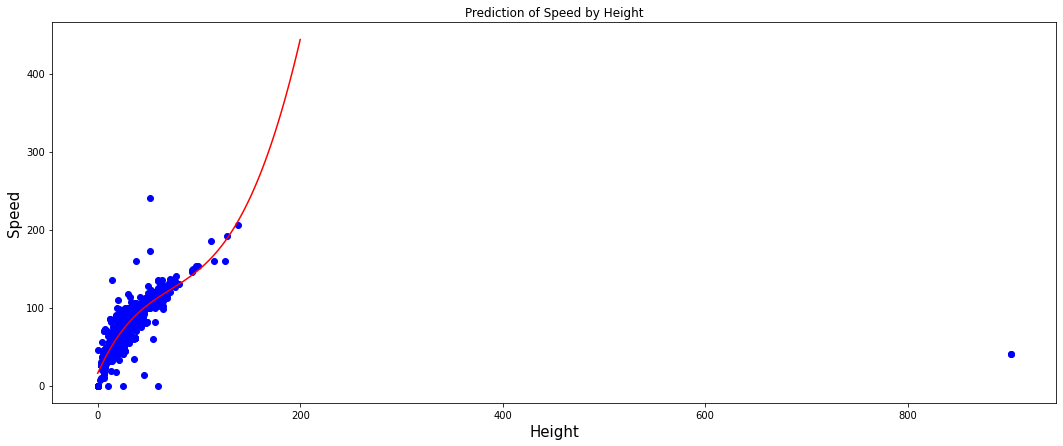

In [58]:
X = df["Height"]
y = df["Speed"]
my_model = np.poly1d(np.polyfit(X, y, 4))
myline = np.linspace(0, 200, 100)
plt.figure(figsize = (18, 7))
plt.scatter(X, y, color = "blue")
plt.plot(myline, my_model(myline), color ="r")
plt.title("Prediction of Speed by Height")
plt.xlabel("Height", size = 15)
plt.ylabel("Speed", size = 15)
plt.show()

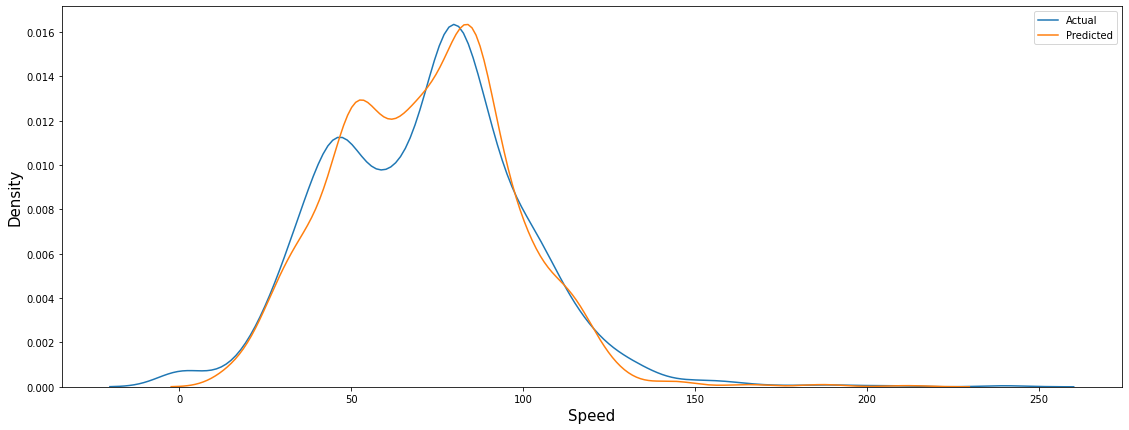

In [59]:
plt.figure(figsize = (19, 7))
sns.kdeplot(data = df, x = y, label = "Actual")
sns.kdeplot(data = df, x = ypipe, label = "Predicted")
plt.xlabel("Speed", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [60]:
r_squared = r2_score(y, ypipe)
r_squared

0.8040865344561232

**Prediction of Speed from Length**

In [61]:
X = df[["Length"]]
y = df["Speed"]

Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(degree = 4)), ("mode", LinearRegression())]
pipe = Pipeline(Input)

pipe.fit(X, y)
ypipe = pipe.predict(X)
pd.DataFrame({"Actual Length": y,
              "Predicted Length": ypipe}).head()

,Actual Length,Predicted Length
0,75.0,86.151986
1,45.0,71.797753
2,30.0,52.294243
3,85.0,97.408796
4,55.0,67.245278


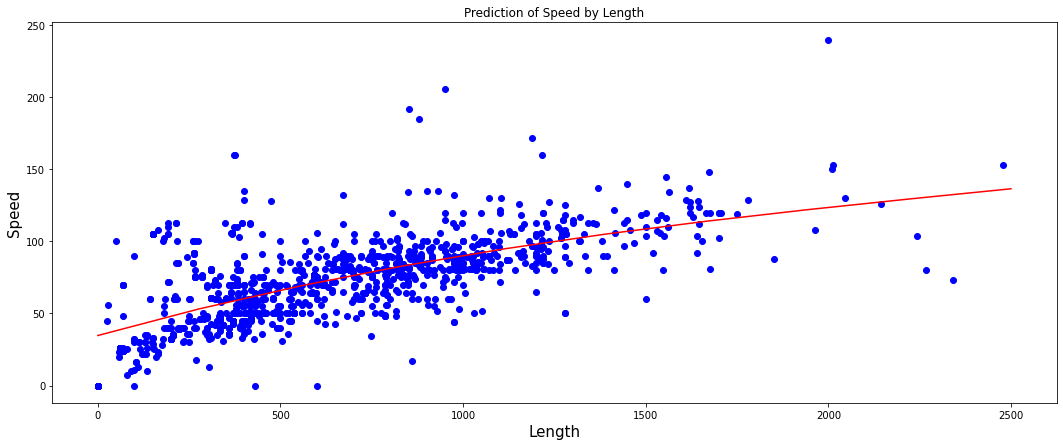

In [62]:
X = df["Length"]
y = df["Speed"]
my_model = np.poly1d(np.polyfit(X, y, 3))
myline = np.linspace(0, 2500, 10)
plt.figure(figsize = (18, 7))
plt.scatter(X, y, color = "blue")
plt.plot(myline, my_model(myline), color ="r")
plt.title("Prediction of Speed by Length")
plt.xlabel("Length", size = 15)
plt.ylabel("Speed", size = 15)
plt.show()

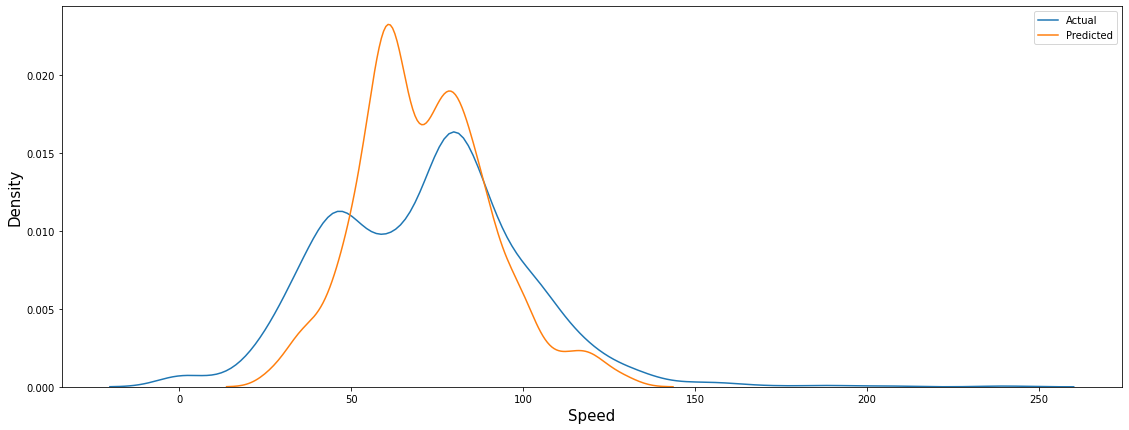

In [63]:
plt.figure(figsize = (19, 7))
sns.kdeplot(data = df, x = y, label = "Actual")
sns.kdeplot(data = df, x = ypipe, label = "Predicted")
plt.xlabel("Speed", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [64]:
r_squared = r2_score(y, ypipe)
r_squared

0.46006763382171734

### Multiple Linear Regression

In [65]:
X = df[["Height", "Length"]]
y = df["Speed"]

In [66]:
mlr = LinearRegression()
mlr.fit(X, y)
yhat = mlr.predict(X)

In [67]:
pd.DataFrame({"Actual Speed": y,
             "Predicted Speed": yhat}).head(5)

,Actual Speed,Predicted Speed
0,75.0,86.434557
1,45.0,69.156297
2,30.0,51.102868
3,85.0,97.137241
4,55.0,63.510925


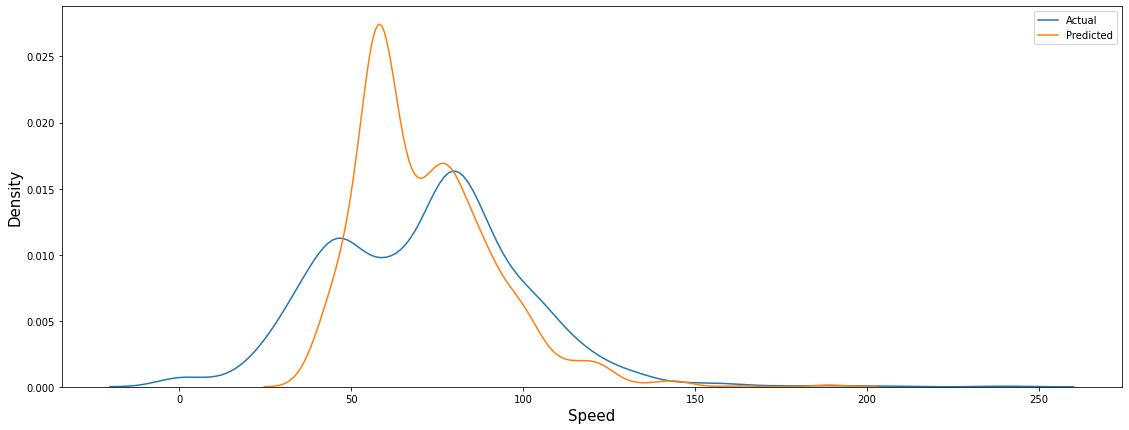

In [68]:
plt.figure(figsize = (19, 7))
sns.kdeplot(data = df, x = y, label = "Actual")
sns.kdeplot(data = df, x = yhat, label = "Predicted")
plt.xlabel("Speed", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [69]:
r_squared = r2_score(y, yhat)
r_squared

0.4887661894651204

### Ridge Regression

In [70]:
x = df[["Length", "Height"]]
y = df["Speed"]
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x, y)
yhat = RidgeModel.predict(x)
yhat[0:5]

array([86.43455701, 69.15629727, 51.10286791, 97.13724106, 63.51092512])

In [71]:
pd.DataFrame({"Actual Speed": y,
              "Prediced Speed": yhat})[0:5]

,Actual Speed,Prediced Speed
0,75.0,86.434557
1,45.0,69.156297
2,30.0,51.102868
3,85.0,97.137241
4,55.0,63.510925


In [72]:
r_squared = r2_score(y, yhat)
r_squared

0.4887661894651202

### K - Nearest Neighbors

In [73]:
x = df[["Length", "Height"]]
y = df["Speed"]
k_array = []
for n in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x, y)
    yhat = knn.predict(x)
    accuracy = accuracy_score(y, yhat)
    k_array.append(accuracy)

np.array(k_array)[0:5]

array([0.93901486, 0.696638  , 0.60046912, 0.54730258, 0.51602815])

In [74]:
best_k = k_array.index(max(k_array))
print("Best Depth index = " + str(best_k))
print("Best Depth Accuracy = " + str(k_array[best_k]))

Best Depth index = 0
Best Depth Accuracy = 0.9390148553557467


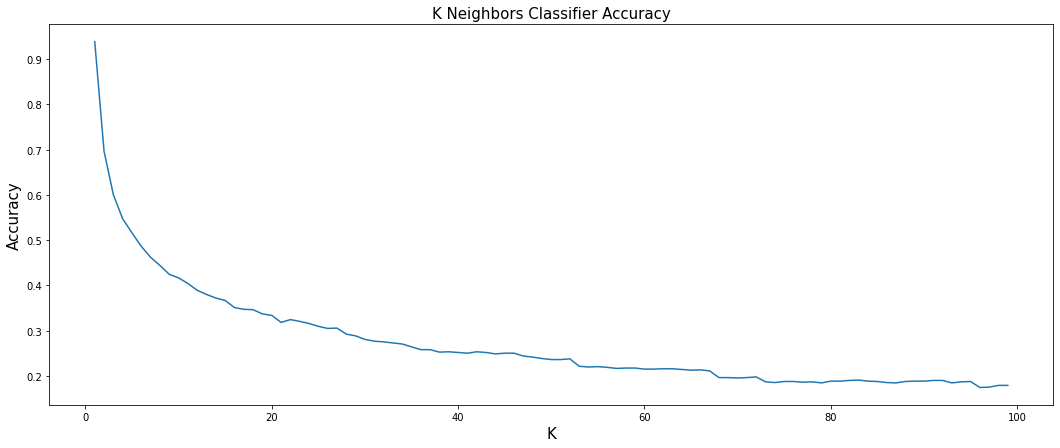

In [75]:
k_list = range(1, 100)
plt.figure(figsize = (18, 7))
plt.plot(k_list, k_array)
plt.xlabel("K", size = 15)
plt.ylabel("Accuracy", size = 15)
plt.title("K Neighbors Classifier Accuracy", size = 15)
plt.show()

In [76]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x, y)
yhat = knn.predict(x)
pd.DataFrame({"Actual": y,
              "Predicted": yhat}).head()

,Actual,Predicted
0,75.0,75.0
1,45.0,60.0
2,30.0,30.0
3,85.0,85.0
4,55.0,55.0


In [77]:
r_squared = r2_score(y, yhat)
r_squared

0.9917853638982945

### Decision Tree

In [78]:
X = df[["Length", "Height"]]
y = df["Speed"]
Tree_array = []
for x in range(1, 100):
    Tree = DecisionTreeClassifier(criterion = "entropy", max_depth = x)
    Tree.fit(X, y)
    yhat = Tree.predict(X)
    accuracy = accuracy_score(y, yhat)
    Tree_array.append(accuracy)
np.array(Tree_array)[0:5]

array([0.10398749, 0.14151681, 0.19859265, 0.25723221, 0.3354183 ])

In [79]:
best_depth = Tree_array.index(max(Tree_array))
print("Best Depth index = " + str(best_depth))
print("Best Depth Accuracy = " + str(Tree_array[best_depth]))

Best Depth index = 15
Best Depth Accuracy = 0.946051602814699


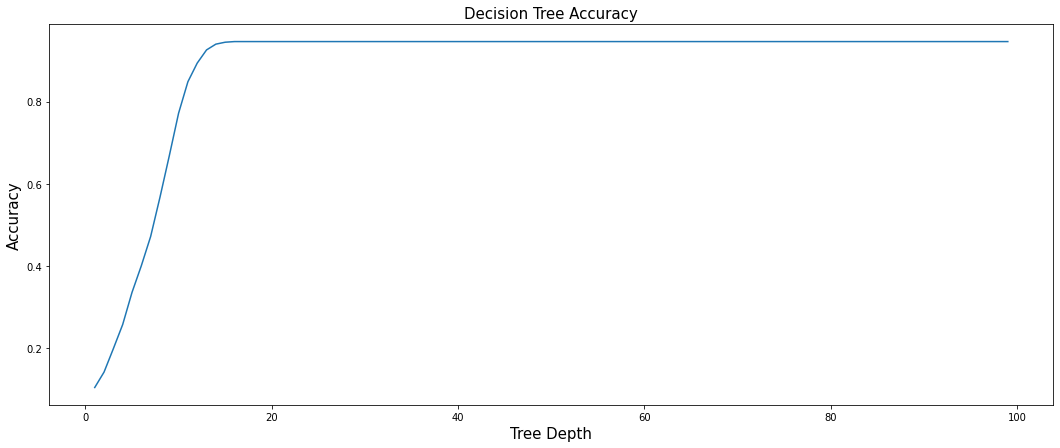

In [80]:
tree_list = range(1, 100)
plt.figure(figsize = (18, 7))
plt.plot(tree_list, Tree_array)
plt.xlabel("Tree Depth", size = 15)
plt.ylabel("Accuracy", size = 15)
plt.title("Decision Tree Accuracy", size = 15)
plt.show()

In [81]:
Tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 15)
Tree.fit(X, y)
yhat = Tree.predict(X)
yhat[0:5]

array([75., 45., 30., 85., 55.])

In [82]:
pd.DataFrame({"Actual Speed": y,
             "Predicted Speed": yhat})[0:10]

,Actual Speed,Predicted Speed
0,75.0,75.0
1,45.0,45.0
2,30.0,30.0
3,85.0,85.0
4,55.0,55.0
5,70.0,70.0
6,80.0,80.0
7,60.0,60.0
8,76.0,76.0
9,48.0,48.0


In [83]:
r_squared = r2_score(y, yhat)
r_squared

0.9933444036979437

### Support Vector Machine

In [84]:
X = df[["Length", "Height"]]
y = df["Speed"]

In [85]:
f1score = []
kernel = ["linear", "poly", "rbf", "sigmoid"]
for k in kernel:
    clf = svm.SVC(kernel = k)
    clf.fit(X, y)
    yhat = clf.predict(X)
    accuracy = f1_score(y, yhat, average = "weighted")
    f1score.append(accuracy)
svm_accuracy = {"linear": f1score[0],
                "poly": f1score[1],
                "rbf": f1score[2],
                "sigmoid": f1score[3]}
svm_accuracy

{'linear': 0.21333659889041603,
 'poly': 0.03950979941691193,
 'rbf': 0.05738924430606359,
 'sigmoid': 0.03213630757719452}

In [86]:
print("Best SVM = " + str(max(svm_accuracy.items(), key = lambda x: x[1])))

Best SVM = ('linear', 0.21333659889041603)


In [87]:
clf = svm.SVC(kernel = "linear")
clf.fit(X, y)
yhat = clf.predict(X)
yhat[0:5]

array([80., 75., 32., 80., 50.])

In [89]:
pd.DataFrame({"Actual Speed": y,
              "Predicted Speed": yhat})[0:5]

,Actual Speed,Predicted Speed
0,75.0,80.0
1,45.0,75.0
2,30.0,32.0
3,85.0,80.0
4,55.0,50.0


In [90]:
r_squared = r2_score(y, yhat)
r_squared

0.715556354117028

# Best Model